In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [19]:
read = cv2.imread(r'All_sky_camera_Astropark_Chaingmai\2024-06-12\638537895689245428.png')

read = cv2.cvtColor(read,cv2.COLOR_BGR2RGB)

In [20]:
mask_del = cv2.imread('mask_delete_5.png',cv2.IMREAD_GRAYSCALE)

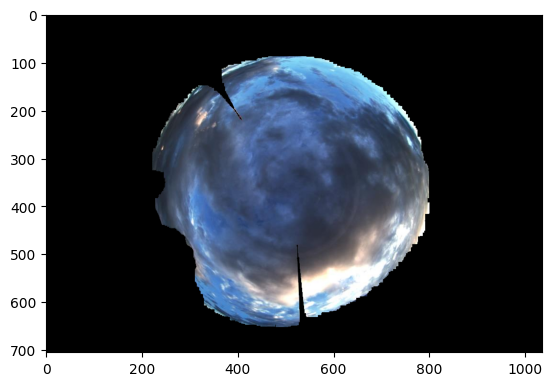

In [21]:
clear_bg = cv2.bitwise_and(read,read,mask=mask_del)

plt.imshow(clear_bg,cmap='gray')

[65, 79, 100]


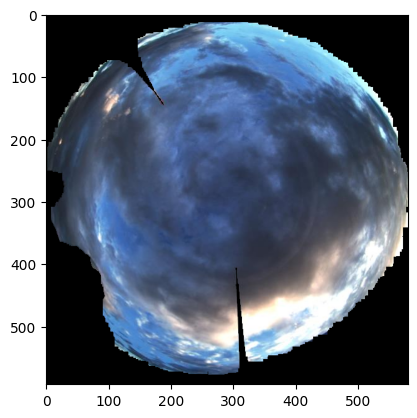

In [22]:
crop = clear_bg [75:668,220:800]

bias_val = []
for i in cv2.split(crop):
    bias = int(np.abs(np.mean(i)))
    bias_val.append(bias)
print(bias_val)
plt.imshow(crop)

1.25


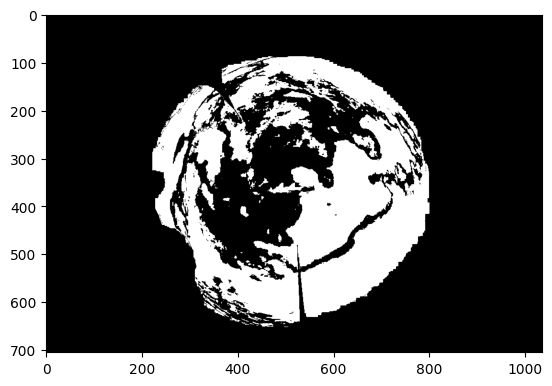

In [23]:
B = bias_val[2]
R = int(0.8*B)
G = bias_val[1]

R_1 = bias_val[0]

n = B/R
print(n)

lower_1 = np.asarray([R,G,B])
upper_1 = np.asarray([255,255,255])
lower_2 = np.asarray([1,0,1])
upper_2 = np.asarray([int(R-n),int(G-n),int(B-n)])

mask_1 = cv2.inRange(clear_bg,lower_1,upper_1)
mask_2 = cv2.inRange(clear_bg,lower_2,upper_2)

mask_comp = cv2.bitwise_or(mask_1,mask_2,mask=None)
_,mask_comp = cv2.threshold(mask_comp,127,255,cv2.THRESH_BINARY)

plt.imshow(mask_comp,cmap='gray')

In [24]:
path = r'All_sky_camera_Astropark_Chaingmai\2024-06-12'

images_read = []

for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path,filename))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    if img is not None:
        images_read.append(img)

In [25]:
R_mean = []
B_mean = []

for i in images_read:
    r,g,b = cv2.split(i)
    B_mean.append(np.mean(b))
    R_mean.append(np.mean(r))

thresh_r = np.mean(R_mean)
thresh_b = np.mean(B_mean)

print(thresh_r)
print(thresh_b)

37.83436323922344
46.94293657262863


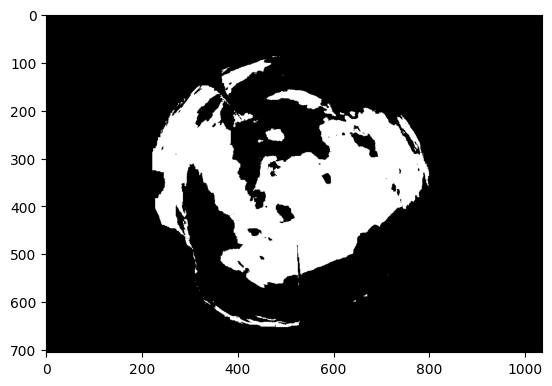

In [26]:
lower_bl = np.asarray([18,21,20])
upper_bl = np.asarray([129,120,129])

mask_bl = cv2.inRange(clear_bg,lower_bl,upper_bl)
_,mask_bl = cv2.threshold(mask_bl,127,255,cv2.THRESH_BINARY)

plt.imshow(mask_bl,cmap='gray')

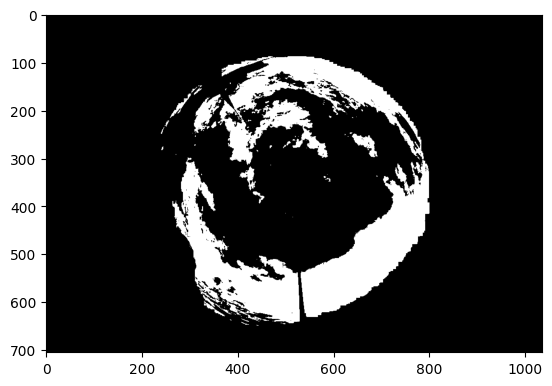

In [27]:
r,g,b = cv2.split(clear_bg)

lower_r = np.asarray([int(R-n)])
upper_r = np.asarray([255])

lower_b = np.asarray([int(B+n)])
upper_b = np.asarray([255])

mask_b = cv2.inRange(b,lower_b,upper_b)
mask_r = cv2.inRange(r,lower_r,upper_r)

mask_rb = cv2.bitwise_and(mask_r,mask_b,mask=None)

plt.imshow(mask_rb,cmap='gray')

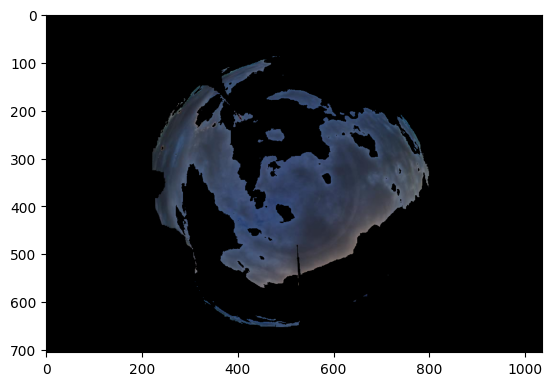

In [28]:
add_bc = cv2.bitwise_and(clear_bg,clear_bg,mask=mask_bl)

plt.imshow(add_bc,cmap='gray')

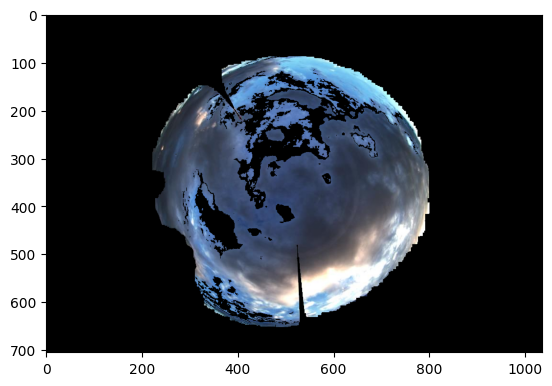

In [29]:
final = cv2.bitwise_and(clear_bg,clear_bg,mask=mask_comp)

if R_1>=thresh_r-n and R_1<=(thresh_r*2)+n:
    final = cv2.bitwise_and(final,final,mask=mask_rb)
    if B>=thresh_b:
        final = cv2.bitwise_or(final,add_bc,mask=None)
    plt.imshow(final)
else:
    plt.imshow(final)

In [30]:
area_cloud = cv2.countNonZero(cv2.cvtColor(final,cv2.COLOR_RGB2GRAY))
area_all = cv2.countNonZero(cv2.cvtColor(clear_bg,cv2.COLOR_RGB2GRAY))

print("cloud coverage percentage : ",(area_cloud/area_all)*100,"%")

cloud coverage percentage :  85.86561117351967 %


# In testing process

In [31]:
r,g,b = cv2.split(final)

r_nz = r[r != 0]
g_nz = g[g != 0]
b_nz = b[b != 0]

In [32]:
mean = np.mean(b_nz)
var  = np.std(b_nz)
Drb  = np.mean(b_nz)-np.mean(r_nz)

print("Mean :",mean)
print("Standard diviation :",var)
print("Different (R-B) :",Drb)

Mean : 137.43343409058707
Standard diviation : 56.723828990358285
Different (R-B) : 42.86668398431965
